# 1. Import Libraries

In [317]:
# Import for Pandas and numpy
import pandas as pd
import numpy as np

# Import for train test split
from sklearn.model_selection import train_test_split

# import for caping
from feature_engine.outliers import Winsorizer

# Import for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# import for Outlier
from scipy import stats

# Import for Data Balancing
from imblearn.over_sampling import SMOTENC

# Import for scaling and encoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Import for Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Import for model
# Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Import Tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

# import report
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# For Saving
from joblib import dump

# Library for warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## 3. Data Loading

In [240]:
# Data Loading
data = pd.read_csv('bank-additional-full.csv',delimiter=";")

---
### 3.1 Data Information

We will see a small overview of the dataset we have by displaying the first and last 10 rows. This step is carried out to be able to understand the contents of the dataset that we have


In [241]:
# Show the first 10 data
print('The first 10 rows data:')
display(data.head(10))

# Show the last 10 data
print('The last 10 rows data:')
display(data.tail(10))

The first 10 rows data:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


The last 10 rows data:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [242]:
# Check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [243]:
# Check the number of columns of integer type
integer_columns = len(data.select_dtypes(include='int64').columns)

# Check the number of columns of float type
float_columns = len(data.select_dtypes(include='float64').columns)

# Check the number of columns of object type
object_columns = len(data.select_dtypes(include='object').columns)

# Displays the number of columns of integer, float, and object types
print(f"Number of columns of integer type: {integer_columns}")
print(f"Number of columns of type float: {float_columns}")
print(f"Number of columns of type object: {object_columns}")

Number of columns of integer type: 5
Number of columns of type float: 5
Number of columns of type object: 11


In [244]:
# Counting the amount of data that is potentially the same as other data
data.duplicated().sum()

12

In [245]:
# Delete duplicate data
data = data.drop_duplicates()

# Check again whether there is still data that has the potential to be the same as other data
data.duplicated().sum()

0

In [246]:
# look for None/null values in the dataframe
data.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [247]:
data = data.dropna()

## 5. Feature Engineering

Before going any further, let's copy the data that we will use in building the model. This is done to avoid things that we don't want in the original data. The data that has been previously loaded will be entered into a new variable where the data in that variable will be processed

In [248]:
# copy the original data set
df = data.copy()

In [249]:
jobCol_categories = df['job'].unique().tolist()
newJobCol_cats = []

for each in jobCol_categories:
    newEach = each.capitalize()
    newEach = newEach.replace('.','')
    newJobCol_cats.append(newEach)
    
jobColReplace_Dict = dict(zip(jobCol_categories, newJobCol_cats))

df['job'] = df['job'].replace(jobColReplace_Dict)

# Cleaning value pada kolom 'marital'
maritalCol_categories = df['marital'].unique().tolist()
newmaritalCol_cats = []

for each in maritalCol_categories:
    newEach = each.capitalize()
    newmaritalCol_cats.append(newEach)

maritalColReplace_Dict= dict(zip(maritalCol_categories, newmaritalCol_cats))

df['marital'] = df['marital'].replace(maritalColReplace_Dict)

# Cleaning value pada kolom 'education'
educationCol_categories = df['education'].unique().tolist()
neweducationCol_cats = []

for each in educationCol_categories:
    newEach = each.replace('.', ' ')
    newEach = newEach.replace('4y', '(4 years)') if '4y' in newEach else newEach
    newEach = newEach.replace('6y', '(6 years)') if '6y' in newEach else newEach
    newEach = newEach.replace('9y', '(9 years)') if '9y' in newEach else newEach
    newEach = newEach.title()
    neweducationCol_cats.append(newEach)

educationColReplace_Dict= dict(zip(educationCol_categories, neweducationCol_cats))
df['education'] = df['education'].replace(educationColReplace_Dict)

# Cleaning value pada kolom 'default'
defaultCol_categories = df['default'].unique().tolist()
newdefaultCol_cats = []

for each in defaultCol_categories:
    newEach = each.capitalize()
    newdefaultCol_cats.append(newEach)
    
defaultColReplace_Dict= dict(zip(defaultCol_categories, newdefaultCol_cats))

df['default'] = df['default'].replace(defaultColReplace_Dict)


# Cleaning value pada kolom 'housing'
housingCol_categories = df['housing'].unique().tolist()
newhousingCol_cats = []

for each in housingCol_categories:
    newEach = each.capitalize()
    newhousingCol_cats.append(newEach)
    
housingColReplace_Dict= dict(zip(housingCol_categories, newhousingCol_cats))

df['housing'] = df['housing'].replace(housingColReplace_Dict)


# Cleaning value pada kolom 'contact'
contactCol_categories = df['contact'].unique().tolist()
newcontactCol_cats = []

for each in contactCol_categories:
    newEach = each.capitalize()
    newcontactCol_cats.append(newEach)
    
contactColReplace_Dict= dict(zip(contactCol_categories, newcontactCol_cats))

df['contact'] = df['contact'].replace(contactColReplace_Dict)

# Cleaning value pada kolom 'loan'
loanCol_categories = df['loan'].unique().tolist()
newLoanCol_cats = []

for each in loanCol_categories:
    newEach = each.capitalize()
    newLoanCol_cats.append(newEach)
    
loanColReplace_Dict= dict(zip(loanCol_categories, newLoanCol_cats))

df['loan'] = df['loan'].replace(loanColReplace_Dict)

# Cleaning value pada kolom 'month'
monthCol_categories = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
newmonthCol_cats = [3,4,5,6,7,8,9,10,11,12]
    
monthColReplace_Dict= dict(zip(monthCol_categories, newmonthCol_cats))

df['month'] = df['month'].replace(monthColReplace_Dict)

# Cleaning value pada kolom 'day_of_week'
day_of_weekCol_categories = ['mon', 'tue', 'wed', 'thu', 'fri']
newday_of_weekCol_cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

day_of_weekColReplace_Dict= dict(zip(day_of_weekCol_categories, newday_of_weekCol_cats))

df['day_of_week'] = df['day_of_week'].replace(day_of_weekColReplace_Dict)

# Cleaning value pada kolom 'poutcome'
poutcomeCol_categories = df['poutcome'].unique().tolist()
newpoutcomeCol_cats = []

for each in poutcomeCol_categories:
    newEach = each.replace('non', 'non-') if 'non' in each else each
    newEach = newEach.capitalize()
    newpoutcomeCol_cats.append(newEach)
    
poutcomeColReplace_Dict= dict(zip(poutcomeCol_categories, newpoutcomeCol_cats))

df['poutcome'] = df['poutcome'].replace(poutcomeColReplace_Dict)

# Cleaning value pada kolom 'y'
yCol_categories = df['y'].unique().tolist()
newyCol_cats = []

for each in yCol_categories:
    newEach = each.capitalize()
    newyCol_cats.append(newEach)
    
yColReplace_Dict= dict(zip(yCol_categories, newyCol_cats))

df['y'] = df['y'].replace(yColReplace_Dict)


## Rename columns
df.rename(columns={
'age': 'age',
'job': 'occupation',
'marital': 'marital_status',
'education': 'education_level',
'default': 'credit_default',
'housing': 'housing_loan',
'loan': 'personal_loan',
'contact': 'contact_method',
'month': 'last_contact_month',
'day_of_week': 'last_contact_day_of_week',
'duration': 'last_contact_duration',
'campaign': 'campaign_contacts',
'pdays': 'days_since_previous_contact',
'previous': 'previous_contacts',
'poutcome': 'previous_campaign_outcome',
'emp.var.rate': 'employment_variation_rate',
'cons.price.idx': 'consumer_price_index',
'cons.conf.idx': 'consumer_confidence_index',
'euribor3m': 'euribor_3_month_rate',
'nr.employed': 'number_employed',
'y': 'subscription_status'
}, inplace=True)


# Replace 'unknown' values with None
df.replace('Unknown', None, inplace=True)

# melakukan drop null
df.dropna(inplace=True)

# melakukan drop duplicate
df.drop_duplicates(inplace=True)

In [250]:
df['subscription_status'] = df['subscription_status'].replace({'Yes': 1, 'No': 0})

In [251]:
df

,age,occupation,marital_status,education_level,credit_default,housing_loan,personal_loan,contact_method,last_contact_month,last_contact_day_of_week,...,campaign_contacts,days_since_previous_contact,previous_contacts,previous_campaign_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,number_employed,subscription_status
0,56,Housemaid,Married,Basic (4 Years),No,No,No,Telephone,5,Monday,...,1,999,0,Non-existent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,Services,Married,High School,No,Yes,No,Telephone,5,Monday,...,1,999,0,Non-existent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,Admin,Married,Basic (6 Years),No,No,No,Telephone,5,Monday,...,1,999,0,Non-existent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,Services,Married,High School,No,No,Yes,Telephone,5,Monday,...,1,999,0,Non-existent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,Admin,Married,Professional Course,No,No,No,Telephone,5,Monday,...,1,999,0,Non-existent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,Retired,Married,Professional Course,No,Yes,No,Cellular,11,Friday,...,1,999,0,Non-existent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,Blue-collar,Married,Professional Course,No,No,No,Cellular,11,Friday,...,1,999,0,Non-existent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,Retired,Married,University Degree,No,Yes,No,Cellular,11,Friday,...,2,999,0,Non-existent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,Technician,Married,Professional Course,No,No,No,Cellular,11,Friday,...,1,999,0,Non-existent,-1.1,94.767,-50.8,1.028,4963.6,1


---
### 5.1 Cardinality Checking

The function of the cardinality check is to evaluate the number of unique values or cardinality of a feature (column) that categorical in the dataset. This is important because high cardinality, that is, a large number of unique values, can cause some problems in data analysis and model building.

In this dataset, we will perform a cardinality check on categorical columns

In [252]:
kolom_objek = df.select_dtypes(include='object').columns.tolist()
print("Kolom bertipe objek:", kolom_objek)

Kolom bertipe objek: ['occupation', 'marital_status', 'education_level', 'credit_default', 'housing_loan', 'personal_loan', 'contact_method', 'last_contact_day_of_week', 'previous_campaign_outcome']


In [253]:
# set colwidth hidher
pd.set_option('display.max.colwidth', None)

cat_cols = ['occupation', 'marital_status', 'education_level', 'credit_default', 'housing_loan', 'personal_loan', 'contact_method', 'last_contact_day_of_week', 'previous_campaign_outcome']

# Create a looping for unique values details
listItem = []
for col in cat_cols :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

# Show the dataframe
pd.DataFrame(columns=['Column Name', 'Number of Unique Values', 'Unique Values'], data=listItem)

,Column Name,Number of Unique Values,Unique Values
0,occupation,11,"[Housemaid, Services, Admin, Technician, Blue-collar, Unemployed, Retired, Entrepreneur, Management, Student, Self-employed]"
1,marital_status,3,"[Married, Single, Divorced]"
2,education_level,7,"[Basic (4 Years), High School, Basic (6 Years), Professional Course, Basic (9 Years), University Degree, Illiterate]"
3,credit_default,2,"[No, Yes]"
4,housing_loan,2,"[No, Yes]"
5,personal_loan,2,"[No, Yes]"
6,contact_method,2,"[Telephone, Cellular]"
7,last_contact_day_of_week,5,"[Monday, Tuesday, Wednesday, Thursday, Friday]"
8,previous_campaign_outcome,3,"[Non-existent, Failure, Success]"


---
### 5.2 Data Splitting

To create a machine learning model, we need to divide the data into two parts, namely the one we want to predict/target (y) and the one to predict/feature (X)

In [254]:
# Define the X and y
# Separating independent variables (features) and dependent variables (targets)
X = df.drop(['subscription_status'], axis=1)
y = df['subscription_status']

In [255]:
# Separating data into a training set (train) and a test set (test)
# With a ratio of 80:20  for validation and test data, ratio 85:15  for validation and train data with seed (random_state) 22
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y,test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

# Check the size
print(f"Shape data train : {X_train.shape}")
print(f"Shape data test : {X_test.shape}")
print(f"Shape data val : {X_val.shape}")

Shape data train : (19429, 20)
Shape data test : (7620, 20)
Shape data val : (3429, 20)


---
### 5.3 Handling Outlier

To deal with outliers, we will first look at the numeric column visualization to see if the numeric data has any outliers. First, We will use box plots to visualize the distribution of numerical data. This is done to see the actual information from the column so that we can find out whether there are outliers in the column. **We will exclude the columns 'required_car_parking_space' and 'repeated_guest'**. Even though the values are numbers, the actual values are binary.

In [256]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19429 entries, 24717 to 6907
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          19429 non-null  int64  
 1   occupation                   19429 non-null  object 
 2   marital_status               19429 non-null  object 
 3   education_level              19429 non-null  object 
 4   credit_default               19429 non-null  object 
 5   housing_loan                 19429 non-null  object 
 6   personal_loan                19429 non-null  object 
 7   contact_method               19429 non-null  object 
 8   last_contact_month           19429 non-null  int64  
 9   last_contact_day_of_week     19429 non-null  object 
 10  last_contact_duration        19429 non-null  int64  
 11  campaign_contacts            19429 non-null  int64  
 12  days_since_previous_contact  19429 non-null  int64  
 13  previous_contacts 

In [257]:
kolom_objek = df.select_dtypes(include=('float64', 'int64')).columns.tolist()
print("Kolom bertipe objek:", kolom_objek)

Kolom bertipe objek: ['age', 'last_contact_month', 'last_contact_duration', 'campaign_contacts', 'days_since_previous_contact', 'previous_contacts', 'employment_variation_rate', 'consumer_price_index', 'consumer_confidence_index', 'euribor_3_month_rate', 'number_employed', 'subscription_status']


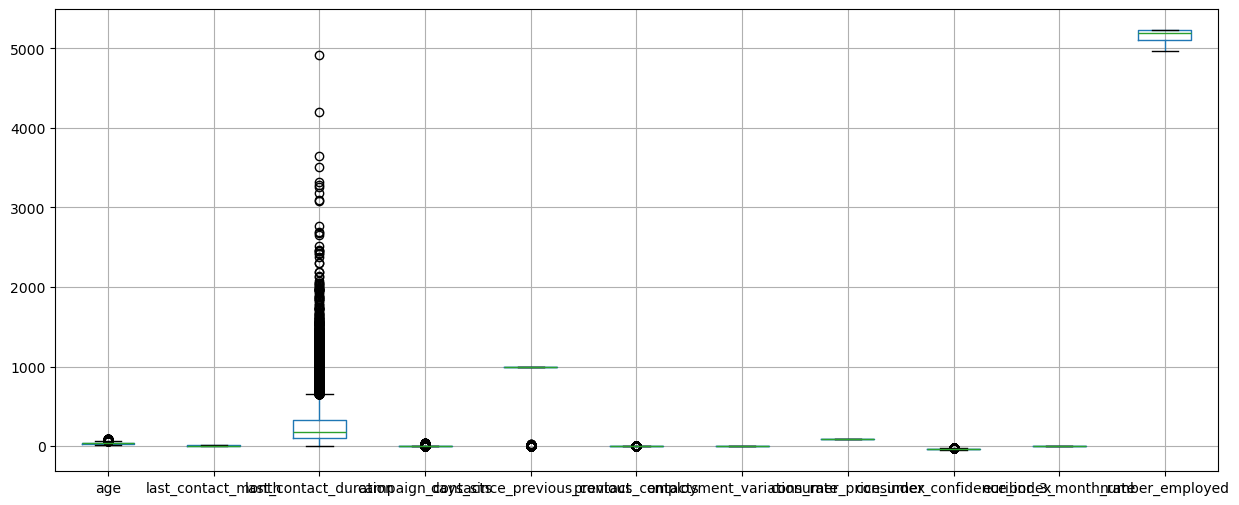

In [258]:
# Create a boxplot before handling outliers
plt.figure(figsize=(15, 6))
X_train[['age', 'last_contact_month', 'last_contact_duration', 'campaign_contacts', 
         'days_since_previous_contact', 'previous_contacts', 'employment_variation_rate', 
         'consumer_price_index', 'consumer_confidence_index', 'euribor_3_month_rate', 
         'number_employed']].boxplot()
plt.show()

In [259]:
# Create function to search the skew value, upper and lower boundaries, and outlier flag
def outlier_analysis(data):

    # create the dataframe and empty lists
    result = pd.DataFrame()
    col_name = []
    skew = []
    upper = []
    lower = []
    has_outliers = []  # New list to indicate if a column has outliers

    # Loop for the column
    for col in data.columns:
        col_name.append(col)

        # Calculate Skewness
        skew_val = data[col].skew()
        skew.append(skew_val)

        # Highly Skewed Upper and Lower Boundaries
        if skew_val > 1 or skew_val < -1:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 3)
            upper_boundary = data[col].quantile(0.75) + (IQR * 3)

        # Moderatly Skewed
        elif skew_val > 0.5 or skew_val < -0.5:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 1.5)
            upper_boundary = data[col].quantile(0.75) + (IQR * 1.5)

        # Normal Distribution
        else :
            std = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].mean() - (std * 3)
            upper_boundary = data[col].mean() + (std * 3)
        
        # Append the upper and lower value
        upper.append(upper_boundary)
        lower.append(lower_boundary)

        # Check for outliers
        outliers = (data[col] < lower_boundary) | (data[col] > upper_boundary)
        has_outliers.append(any(outliers))
    
    # Add into the dataframe
    result['columns'] = col_name
    result['skewness'] = skew
    result['upper boundary'] = upper
    result['lower boundary'] = lower
    result['has_outliers'] = has_outliers  # Add the has_outliers column

    return result


In [260]:
# Select the data except categorical and target columns
outlier_check = X_train[[ 'age', 'last_contact_month', 'last_contact_duration', 'campaign_contacts', 
         'days_since_previous_contact', 'previous_contacts', 'employment_variation_rate', 
         'consumer_price_index', 'consumer_confidence_index', 'euribor_3_month_rate', 
         'number_employed']]

# Check the data skewness and boundaries
outlier_analysis(outlier_check)

,columns,skewness,upper boundary,lower boundary,has_outliers
0,age,1.001383,87.000000,-11.000000,True
1,last_contact_month,0.751433,12.500000,0.500000,False
2,last_contact_duration,3.491666,979.000000,-554.000000,True
3,campaign_contacts,5.077353,9.000000,-5.000000,True
4,days_since_previous_contact,-4.538594,999.000000,999.000000,True
5,previous_contacts,3.591511,0.000000,0.000000,True
6,employment_variation_rate,-0.535369,6.200000,-6.600000,False
7,consumer_price_index,-0.114484,96.276553,90.762553,False
8,consumer_confidence_index,0.374406,-21.700216,-59.500216,False
9,euribor_3_month_rate,-0.510877,10.433000,-4.159000,False


In [261]:
# Capping the skewed distribution
winsoriser_fare = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['age', 'last_contact_duration', 'campaign_contacts'])

X_train = winsoriser_fare.fit_transform(X_train)
X_test_capped = winsoriser_fare.transform(X_test)
X_val_capped = winsoriser_fare.transform(X_val)

---
### 5.4 Feature Selection

To test the correlation of data in the dataset against 'booking_status', we can use the correlation test method where we will find out which target column has a correlation with which numeric and categorical columns. ***To see the correlation value between the columns***, we will use ***statistical tests*** to get the p-value between the two columns

#### 5.4.1 Numerical

To find the correlation between the target and the numerical column , we need to first ***determine which columns fall into the numerical category*** and put them into one variable to make it easier for us to process the data.

In [262]:
# Create a list containing other numeric columns
numeric_column = ['age', 'last_contact_month', 'last_contact_duration', 'campaign_contacts', 
         'days_since_previous_contact', 'previous_contacts', 'employment_variation_rate', 
         'consumer_price_index', 'consumer_confidence_index', 'euribor_3_month_rate', 
         'number_employed']

# Create a new variable named df_numeric which contains other numeric column 
numeric = X_train[numeric_column]

In [263]:
# Create a loop to test the correlation between the categorical column and 'price' using the kendalltau technique
for i in numeric:
     
    corr, pval = stats.spearmanr(X_train[i],y_train)
    print(f"Correlation between {i} with booking_status")
    print(f"Correlation Value :{corr}")
    if pval < 0.05:
        print(f"P-value :{pval} -> Both columns have a correlation")
    else:
        print(f"P-value :{pval}")

    print('==================================================================')

Correlation between age with booking_status
Correlation Value :-0.002313149538839225
P-value :0.7471460073653041
Correlation between last_contact_month with booking_status
Correlation Value :0.01257163988290999
P-value :0.07972368307347336
Correlation between last_contact_duration with booking_status
Correlation Value :0.35459826052685534
P-value :0.0 -> Both columns have a correlation
Correlation between campaign_contacts with booking_status
Correlation Value :-0.06052161169538211
P-value :3.088180413149045e-17 -> Both columns have a correlation
Correlation between days_since_previous_contact with booking_status
Correlation Value :-0.3257354327746304
P-value :0.0 -> Both columns have a correlation
Correlation between previous_contacts with booking_status
Correlation Value :0.19374105864421307
P-value :1.1939476184560767e-163 -> Both columns have a correlation
Correlation between employment_variation_rate with booking_status
Correlation Value :-0.2575064059856087
P-value :8.17834361160

#### 5.4.2 Categorical

To find the correlation between the target and the categorical column, we need to first ***determine which columns fall into the categorical category*** and put them into one variable to make it easier for us to process the data.

In [264]:
# Grouping categorical columns into one variable
categorical = ['occupation', 'marital_status', 'education_level', 'credit_default', 'housing_loan', 'personal_loan', 'contact_method', 'last_contact_day_of_week', 'previous_campaign_outcome']

In [265]:
# Create a loop to test the correlation between the categorical column and 'price' using the kendalltau technique
for i in categorical:
     
    corr, pval = stats.kendalltau(X_train[i],y_train)
    print(f"Correlation between {i} with booking_status")
    print(f"Correlation Value :{corr}")
    if pval < 0.05:
        print(f"P-value :{pval} -> Both columns have a correlation")
    else:
        print(f"P-value :{pval}")

    print('==================================================================')

Correlation between occupation with booking_status
Correlation Value :0.009629478628549461
P-value :0.12675194230386577
Correlation between marital_status with booking_status
Correlation Value :0.03692859750002567
P-value :8.820282049522075e-08 -> Both columns have a correlation
Correlation between education_level with booking_status
Correlation Value :0.03526039753030202
P-value :4.743512478563969e-08 -> Both columns have a correlation
Correlation between credit_default with booking_status
Correlation Value :-0.0038776103588165573
P-value :0.5888672629538081
Correlation between housing_loan with booking_status
Correlation Value :0.017784545377068573
P-value :0.013179287201014581 -> Both columns have a correlation
Correlation between personal_loan with booking_status
Correlation Value :-0.004459974904858204
P-value :0.5341715420676794
Correlation between contact_method with booking_status
Correlation Value :-0.14764705513577348
P-value :4.1733837664316084e-94 -> Both columns have a cor

### 5.5 Data Balancing

As we found during the EDA process, we found that our data is imbalance. Therefore, we will do handling imbalance in the dataset to help the model perform better. We consider this method since we have categorical data in the dataset as well

In [266]:
# Find the percentage of y train values
total_y = y_train.value_counts(normalize=False)

print("Total Value Target:")
print(total_y)

Total Value Target:
subscription_status
0    16953
1     2476
Name: count, dtype: int64


In [267]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19429 entries, 24717 to 6907
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          19429 non-null  int64  
 1   occupation                   19429 non-null  object 
 2   marital_status               19429 non-null  object 
 3   education_level              19429 non-null  object 
 4   credit_default               19429 non-null  object 
 5   housing_loan                 19429 non-null  object 
 6   personal_loan                19429 non-null  object 
 7   contact_method               19429 non-null  object 
 8   last_contact_month           19429 non-null  int64  
 9   last_contact_day_of_week     19429 non-null  object 
 10  last_contact_duration        19429 non-null  float64
 11  campaign_contacts            19429 non-null  int64  
 12  days_since_previous_contact  19429 non-null  int64  
 13  previous_contacts 

In [268]:
kolom_objek = X_train.select_dtypes(include=('object')).columns.tolist()
print("Kolom bertipe objek:", kolom_objek)

Kolom bertipe objek: ['occupation', 'marital_status', 'education_level', 'credit_default', 'housing_loan', 'personal_loan', 'contact_method', 'last_contact_day_of_week', 'previous_campaign_outcome']


In [269]:
smotenc = SMOTENC([1,2,3,4,5,6,7,9,14], random_state = 22)
X_train, y_train = smotenc.fit_resample(X_train, y_train)
y_train.value_counts()

c:\Users\Ogi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Ogi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Ogi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Ogi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_

subscription_status
0    16953
1    16953
Name: count, dtype: int64

--- 
### 5.6 Encoding and Scaling

The numerical data is not on the same scale, so we need a scaler to help the model perform better. In this process, we will use **Standard Scaler** as the scaling method and combine it later in the pipeline to avoid data leakage since it can be a good practice even after handling outliers. For the categorical we will try to use **One Hot Encoder** since our data is nominal type

**StandardScaler is a feature scaling technique used in data analysis and statistical modeling to transform numerical features so that they have a mean of zero and a variance of one.** By using StandardScaler, we ensure that each feature in the dataset contributes proportionally to the learning process, without letting the effects of varying scales or magnitudes interfere with the interpretation or performance of the model.

**OneHotEncoder is an coding technique used in data processing to convert categorical variables into binary representations called one-hot vectors.** This method is used when the values of a categorical column are not levels of each other

In [270]:
# Define the Scaling method
scaler = StandardScaler()

# Define the Encoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [234]:
# Columns that will be dropped
drop_columns = ['age', 'last_contact_month','occupation', 'credit_default', 'personal_loan']

# Columns that will be scaled
scaled_columns = ['last_contact_duration', 'campaign_contacts', 
         'days_since_previous_contact', 'previous_contacts', 'employment_variation_rate', 
         'consumer_price_index', 'consumer_confidence_index', 'euribor_3_month_rate', 
         'number_employed']

# Columns that will be encoded
encoded_columns = ['marital_status', 'education_level', 'housing_loan', 'contact_method', 
                   'last_contact_day_of_week', 'previous_campaign_outcome']

# Define the preprocessing steps for each type of column
passthrough_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')) # Impute missing values if any
])

scaling_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) # Standardize the numerical features
])

encoding_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore')) # Encode categorical features
])

# Create ColumnTransformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(transformers=[
    ('scaling', scaling_transformer, scaled_columns),
    ('encoding', encoding_transformer, encoded_columns),
    ('drop', 'drop', drop_columns) # Drop specified columns
])

In [271]:
X_train_ANN = preprocessor.fit_transform(X_train)
X_val_ANN = preprocessor.transform(X_val)
X_test_ANN = preprocessor.transform(X_test)
X_train_ANN.shape

c:\Users\Ogi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Ogi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Ogi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Ogi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not ha

(33906, 31)

## 6. Model Definition

**The ANN Sequential API** is the simplest way to create neural network models in Keras. This model makes it possible to create a model layer by layer sequentially. In this modeling approach, there is no need to determine the input size explicitly1. However, this API has limitations, namely that it does not allow dividing or branching layers, and cannot have multiple inputs or outputs

In [296]:
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

initializer = RandomNormal(mean=0, stddev=1, seed=seed)
loss_function = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [330]:
from tensorflow.keras.metrics import Recall

# Menggunakan Recall sebagai metrik
recall_metric = Recall()

# Create ANN Model
model_sequential = Sequential([
    Input(shape=(31,), name='input-layer'),
    Dense(216, activation='relu', kernel_initializer=initializer, name='hidden-layer-1'),
    Dense(36, activation='relu', kernel_initializer=initializer, name='hidden-layer-2'),
    Dense(5, activation='relu', kernel_initializer=initializer, name='hidden-layer-3'),
    Dense(1, activation="sigmoid", kernel_initializer=initializer, name='output-layer')
])

# Compile the model
model_sequential.compile(loss=loss_function, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy',recall_metric])

# Print the summary
model_sequential.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-layer-1 (Dense)      (None, 216)               6912      
                                                                 
 hidden-layer-2 (Dense)      (None, 36)                7812      
                                                                 
 hidden-layer-3 (Dense)      (None, 5)                 185       
                                                                 
 output-layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 14915 (58.26 KB)
Trainable params: 14915 (58.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


It can be seen from the results of the process above that the sequential model architecture is used to create and compile neural network models. The contents and explanation are as follows:

1. **Model:** The model used is the Sequential model from Keras. This model is created by adding layers one by one sequentially.
2. **Hidden Layer:** There are 3 hidden layers in this model. Each has 216, 36, 5 neurons.
3. **Initializer:** The initializer used is RandomNormal with a mean of 0 and a standard deviation of 1. This initializer is used to initialize the initial weights of the neurons in the model.
4. **Loss Function:** The loss function used is BinaryCrossentropy. This function is usually used for binary classification problems.
5. **Optimizer:** The optimizer used is Adam with a learning rate of 0.001. This optimizer is used to update model weights based on the gradient loss function.
6. **Seed:** The seed used is 20. This seed is used to ensure that the results obtained are reproducible. This is because some operations in TensorFlow and NumPy are stochastic, and setting the seed will ensure that the results are consistent across each run.

## 7. ANN Training 

In [332]:
# creating callback 1 is intended to store the sequential model
callbacks1= [
     EarlyStopping(monitor=('val_accuracy'), patience=5, restore_best_weights=True),
     ModelCheckpoint('model_sequential.keras', save_best_only=True)
]

In [333]:
# process to train the sequential model
history1 = model_sequential.fit(X_train_ANN, y_train, validation_data = (X_val_ANN, y_val), epochs=30, verbose=1, callbacks=callbacks1)

Epoch 1/30


1060/1060 [==============================] - 6s 4ms/step - loss: 0.4354 - accuracy: 0.8255 - recall_6: 0.9526 - val_loss: 0.3194 - val_accuracy: 0.8440 - val_recall_6: 0.8467
Epoch 2/30
1060/1060 [==============================] - 4s 3ms/step - loss: 0.2871 - accuracy: 0.8921 - recall_6: 0.9452 - val_loss: 0.2921 - val_accuracy: 0.8728 - val_recall_6: 0.7990
Epoch 3/30
1060/1060 [==============================] - 4s 3ms/step - loss: 0.2747 - accuracy: 0.8960 - recall_6: 0.9468 - val_loss: 0.3566 - val_accuracy: 0.8390 - val_recall_6: 0.8920
Epoch 4/30
1060/1060 [==============================] - 4s 3ms/step - loss: 0.2605 - accuracy: 0.9021 - recall_6: 0.9469 - val_loss: 0.2851 - val_accuracy: 0.8798 - val_recall_6: 0.8015
Epoch 5/30
1060/1060 [==============================] - 4s 3ms/step - loss: 0.2525 - accuracy: 0.9045 - recall_6: 0.9474 - val_loss: 0.3996 - val_accuracy: 0.8241 - val_recall_6: 0.9121
Epoch 6/30
1060/1060 [==============================] - 4s 3ms/step - loss: 0.249

# 8. Evaluate

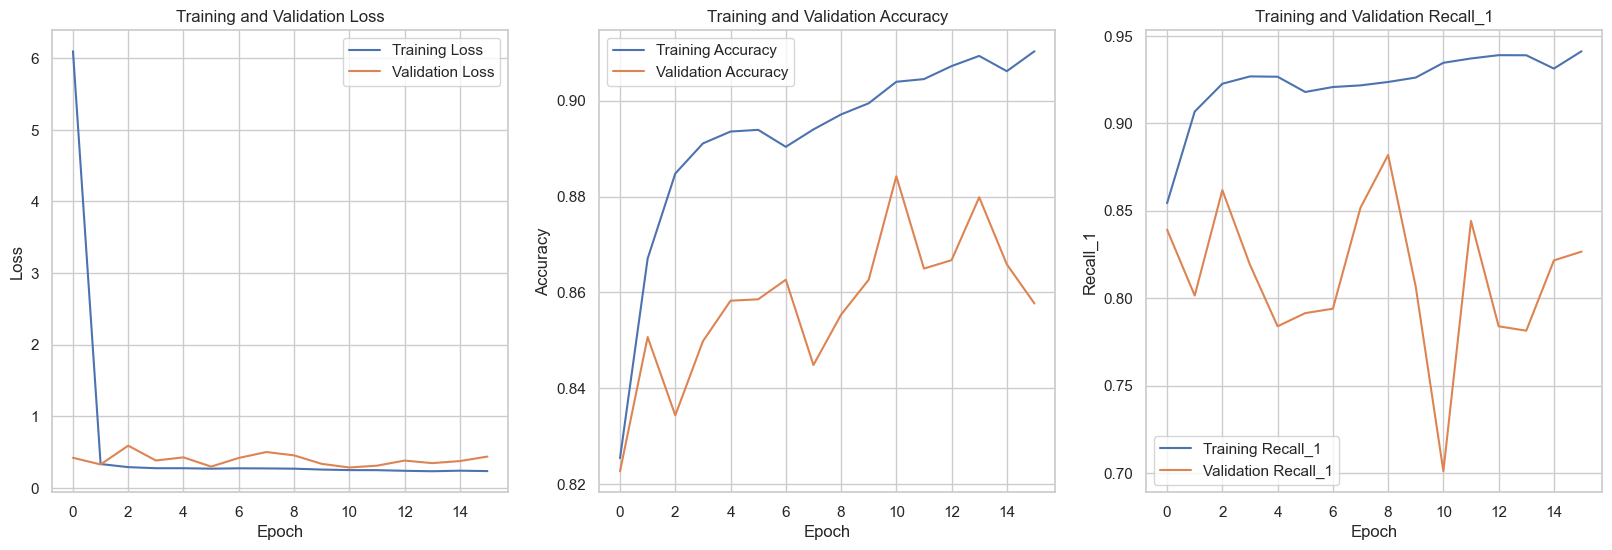

In [307]:
# Setel tema Seaborn
sns.set(style="whitegrid")

# Membuat subplot dengan 3 kolom
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plotting Loss, Accuracy, dan Recall
for ax, metric, ylabel in zip(axes, ['loss', 'accuracy', 'recall_1'], ['Loss', 'Accuracy', 'Recall_1']):
    if metric == 'recall':
        sns.lineplot(data=history1.history[metric], label=f'Training {ylabel}', ax=ax)
        sns.lineplot(data=history1.history[f'val_{metric}'], label=f'Validation {ylabel}', ax=ax)
        ax.set(xlabel='Epoch', ylabel=ylabel)
        ax.set_title(f'Training and Validation {ylabel}')
        ax.legend()
    else:
        sns.lineplot(data=history1.history[metric], label=f'Training {ylabel}', ax=ax)
        sns.lineplot(data=history1.history[f'val_{metric}'], label=f'Validation {ylabel}', ax=ax)
        ax.set(xlabel='Epoch', ylabel=ylabel)
        ax.set_title(f'Training and Validation {ylabel}')
        ax.legend()

# Menampilkan plot
plt.show()

From the history results on the Sequential model train, we can take information that the loss from training and validation continues to shrink and the gradient of train and validation is very close to what describes the best fit for the loss metric.In the accuracy metric in train and validation, even though it looks like an exploding gradient, in fact the rise and fall of the accuracy value is still around 0.5.Meanwhile in Recall visualization, the diffrence is quite big

In [308]:
def performance_check(model_sequential, X, y):
  display_labels =['No', 'Yes']
  y_pred = model_sequential.predict(X)
  predictions = np.where(y_pred>= 0.5, 1, 0)
  cm = confusion_matrix(y, predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
  disp.plot(cmap=plt.cm.Blues)
  plt.show()
  print(classification_report(y, predictions, target_names=display_labels))

239/239 [==============================] - 1s 2ms/step


c:\Users\Ogi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Ogi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Ogi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Ogi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_

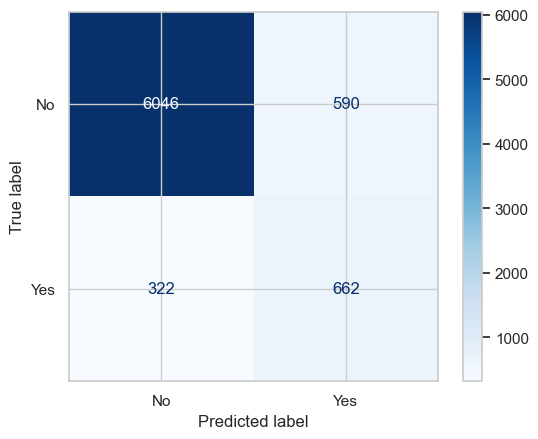

              precision    recall  f1-score   support

          No       0.95      0.91      0.93      6636
         Yes       0.53      0.67      0.59       984

    accuracy                           0.88      7620
   macro avg       0.74      0.79      0.76      7620
weighted avg       0.90      0.88      0.89      7620



c:\Users\Ogi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Ogi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Ogi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Ogi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_

In [310]:
performance_check(model_sequential, X_test_ANN, y_test)

Based on the results above, the model has an accuracy of 88%, which means the model can predict correctly in 88% of cases. However, accuracy alone is not enough to evaluate model performance, especially if the data is imbalanced.

1. For the 'No' class, the model has a precision of 0.95 and a recall of 0.91. This means the model is quite good at predicting which customers do not cancel orders.
2. However, for the 'Yes' class, the model has a precision of 0.53 and a recall of 0.67. This means the model is less good at predicting customers who will churn compared to predicting customers who will not.

In [311]:
print('Train Data Evaluate :')
lstm_tuned_train_evaluate = model_sequential.evaluate(X_train_ANN, y_train)
print(' ')

print('Validation Data Evaluate :')
lstm_tuned_val_evaluate = model_sequential.evaluate(X_val_ANN, y_val)
print(' ')

print('Test Data Evaluate :')
lstm_tuned_test_evaluate = model_sequential.evaluate(X_test_ANN,y_test)

Train Data Evaluate :
1060/1060 [==============================] - 3s 2ms/step - loss: 0.2574 - accuracy: 0.8989 - recall_1: 0.8812
 
Validation Data Evaluate :
108/108 [==============================] - 0s 3ms/step - loss: 0.2867 - accuracy: 0.8842 - recall_1: 0.7010
 
Test Data Evaluate :
239/239 [==============================] - 1s 2ms/step - loss: 0.2982 - accuracy: 0.8803 - recall_1: 0.6728


From the information above, we have the results of evaluating model performance on three different datasets: training data, validation data, and test data.

- **Train Data Evaluate:** The model has an accuracy of 89.89% and a recall of 88.12% on training data. This shows that the model is able to perform classification well and identify most of the positive samples.

- **Validation Data Evaluate:** On validation data, the model has an accuracy of 88.42% and a recall of 70.10%. Even though the accuracy is still quite high, there is a decrease in the recall value compared to the training data. This suggests that the model may have difficulty identifying some true positive samples.

- **Test Data Evaluate:** On test data, the model has an accuracy of 88.03% and a recall of 67.28%. These results are similar to the evaluation results on validation data, showing the consistency of the model's performance when tested on data that has never been seen before.

Overall, although the model shows good performance with relatively high accuracy values, it is necessary to pay attention to the decrease in recall values on validation and testing data. This suggests that there is room to improve the model's performance, especially in terms of identifying positive samples.

In [360]:
#library untuk model saving
import pickle

# Export the model
with open('model.pkl', 'wb') as file_1 :
    pickle.dump(svc_pipeline, file_1)